In [2]:
import numpy as np
from plyfile import PlyData, PlyElement #open3d
import matplotlib.pyplot as plt
import cv2 as cv

Text(0.5, 0, 'z')

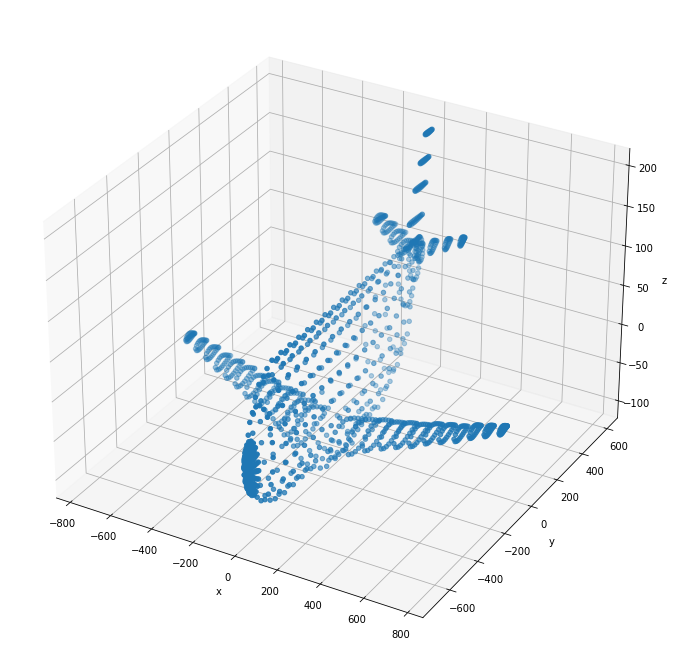

In [4]:
pcd = PlyData.read(r'airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis=0)
points = points-np.mean(points,axis=1).reshape(3,1)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

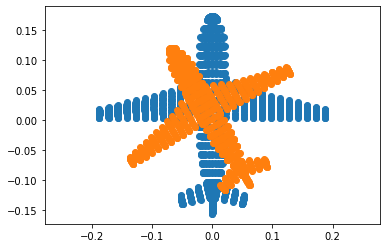

In [5]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)

R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])

P1=K @ np.concatenate((R,t),axis=1)


rotation = 30*np.pi/180

R=np.array([[np.cos(rotation),-np.sin(rotation),0],[np.sin(rotation),np.cos(rotation),0],[0,0,1]])
K=np.array([[0.8,0,0],[0,0.8,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])

P2=K @ np.concatenate((R,t),axis=1)

x1=P1@X
x2=P2@X
x1=x1/x1[2,:]
x2=x2/x2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis("equal")
plt.show()

Item 1 area in pixels = 59143
Item 1 area in pixels = 2318.642172
Item 2 area in pixels = 59211
Item 2 area in pixels = 2321.3080440000003


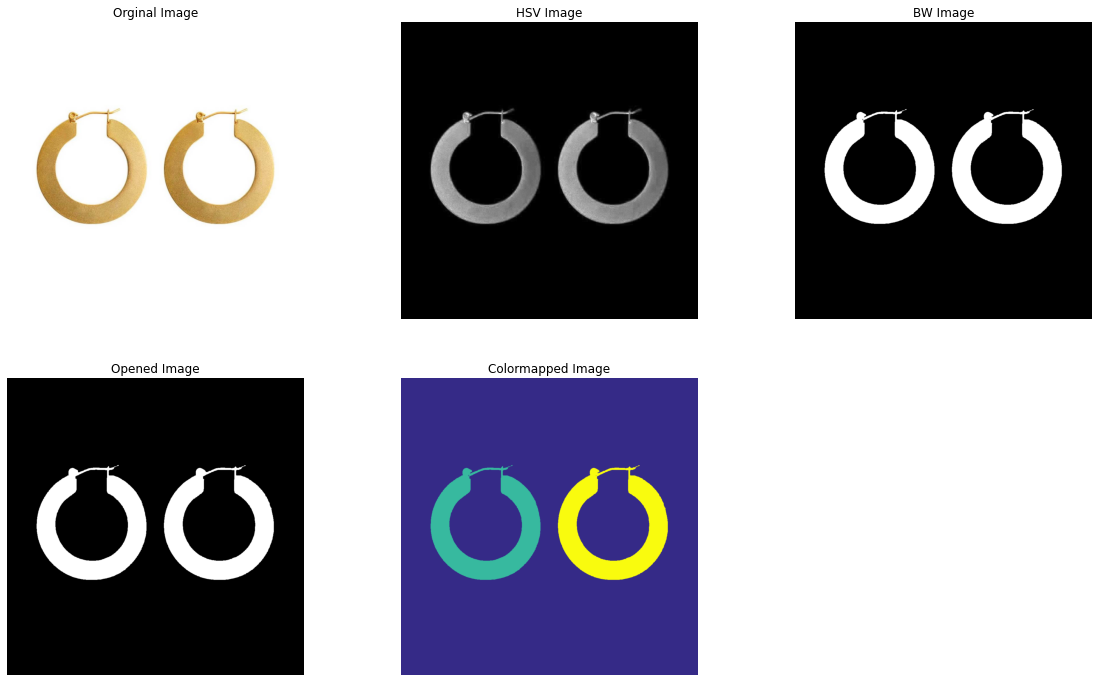

In [12]:
im=cv.imread('earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)                                                                   
th, bw = cv.threshold(hsv[:,:, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)                               
# Remove dots in the object foregound using closing                                                       
w = 5                                                                                                     
kernel = np.ones((w,w), np.uint8)                                                                         
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)                                                      

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)                      
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)                     

Z = 720 # mm                                                                                               
f = 8 # mm                                                                                                 
for i, s in enumerate(stats):                                                                              
    if i != 0:                                                                                                 
        print('Item',i,'area in pixels =',s[4])                                                              
        print('Item',i,'area in pixels =',s[4]*(2.2e-3)**2*(Z*Z)/(f*f))                                       


fig,ax=plt.subplots(2,3,figsize=(20,12))
ax[0,0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0,0].set_title('Orginal Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(hsv[:, :, 1],cv.COLOR_BGR2RGB)) 
ax[0,1].set_title('HSV Image')
ax[0,1].axis('off')


ax[0,2].imshow(cv.cvtColor(bw,cv.COLOR_BGR2RGB))
ax[0,2].set_title('BW Image')  
ax[0,2].axis('off')


ax[1,0].imshow(cv.cvtColor(opened,cv.COLOR_BGR2RGB))
ax[1,0].set_title('Opened Image')
ax[1,0].axis('off')


ax[1,1].imshow(cv.cvtColor(colormapped,cv.COLOR_BGR2RGB)) 
ax[1,1].set_title('Colormapped Image') 
ax[1,1].axis('off')
[axi.set_axis_off() for axi in ax.ravel()]
plt.show()

In [15]:
im = cv.imread (r'allenkeys.jpg' , cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv.Canny(im, 50, 150)
# Copy edges to the images that will display the results in BGR
canny_color = cv.cvtColor(canny, cv.COLOR_GRAY2BGR)
lines = cv.HoughLines(canny, 1, np.pi/180, 170, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*a))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*a))
        cv.line(canny_color, pt1, pt2, (0,0,255), 1, cv.LINE_AA)

fig, ax = plt.subplots(3,1, figsize=(12,12))
ax[0].imshow(im)
ax[1].imshow(canny)
ax[2].imshow(canny_color)
r = cv.selectROI('Image', canny_color, showCrosshair=True, fromCenter=False)
print(r)
for i in range(3):
    ax[i].axis('off')

x0, y0 = int(r[0] + r[2]/2), int(r[1] + r[3]/2)
m = b/a
m = np.tan(np.median(lines[:,0,1]))
c = y0 - m*x0

cv.line(canny_color, (0, int(c)), (im.shape[0], int(m*im.shape[0] + c)), (0, 255, 0), 2, cv.LINE_AA)
fig, ax = plt.subplot()
ax.imshow(canny_color)
ax.axis('off')

dy = 1
y_sub_pixel = np.arrange(0, im.shape[0] - 1, dy)
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)

#for i,y in enumerate(y_sub_pixel):
    	
#fig, ax = plt.subplots(figsize=(30 ,5))
#ax.plot(f_sub_pixel_nn)